In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("../input/heart-failure-prediction/heart.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Exploring data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

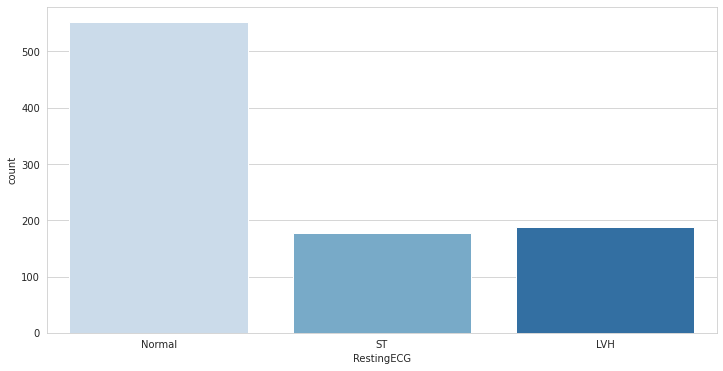

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="RestingECG", data=data, palette='Blues');

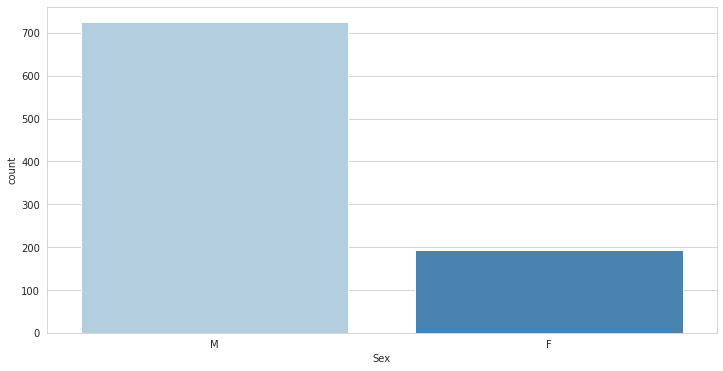

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="Sex", data=data, palette='Blues');

In [10]:
data.shape

(918, 12)

In [11]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


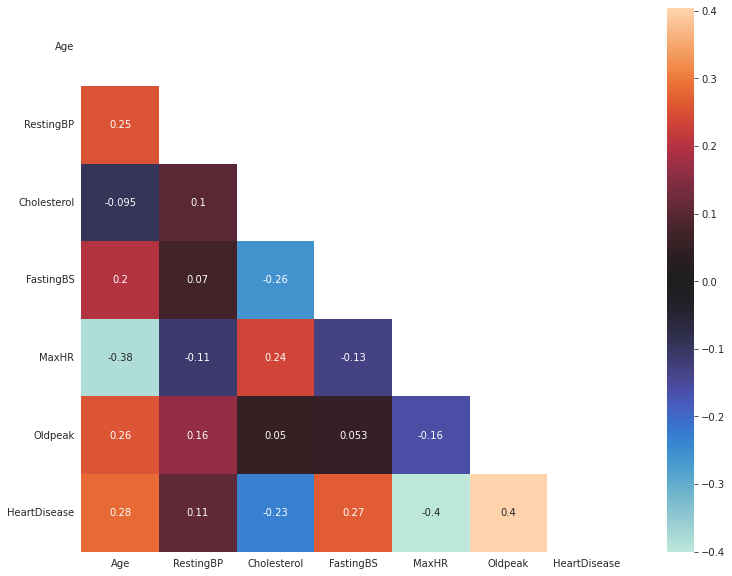

In [12]:
plt.figure(figsize=(15,10))
matrix=np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix,square=True, cmap="icefire")
plt.yticks(rotation=0)
plt.show()

In [13]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

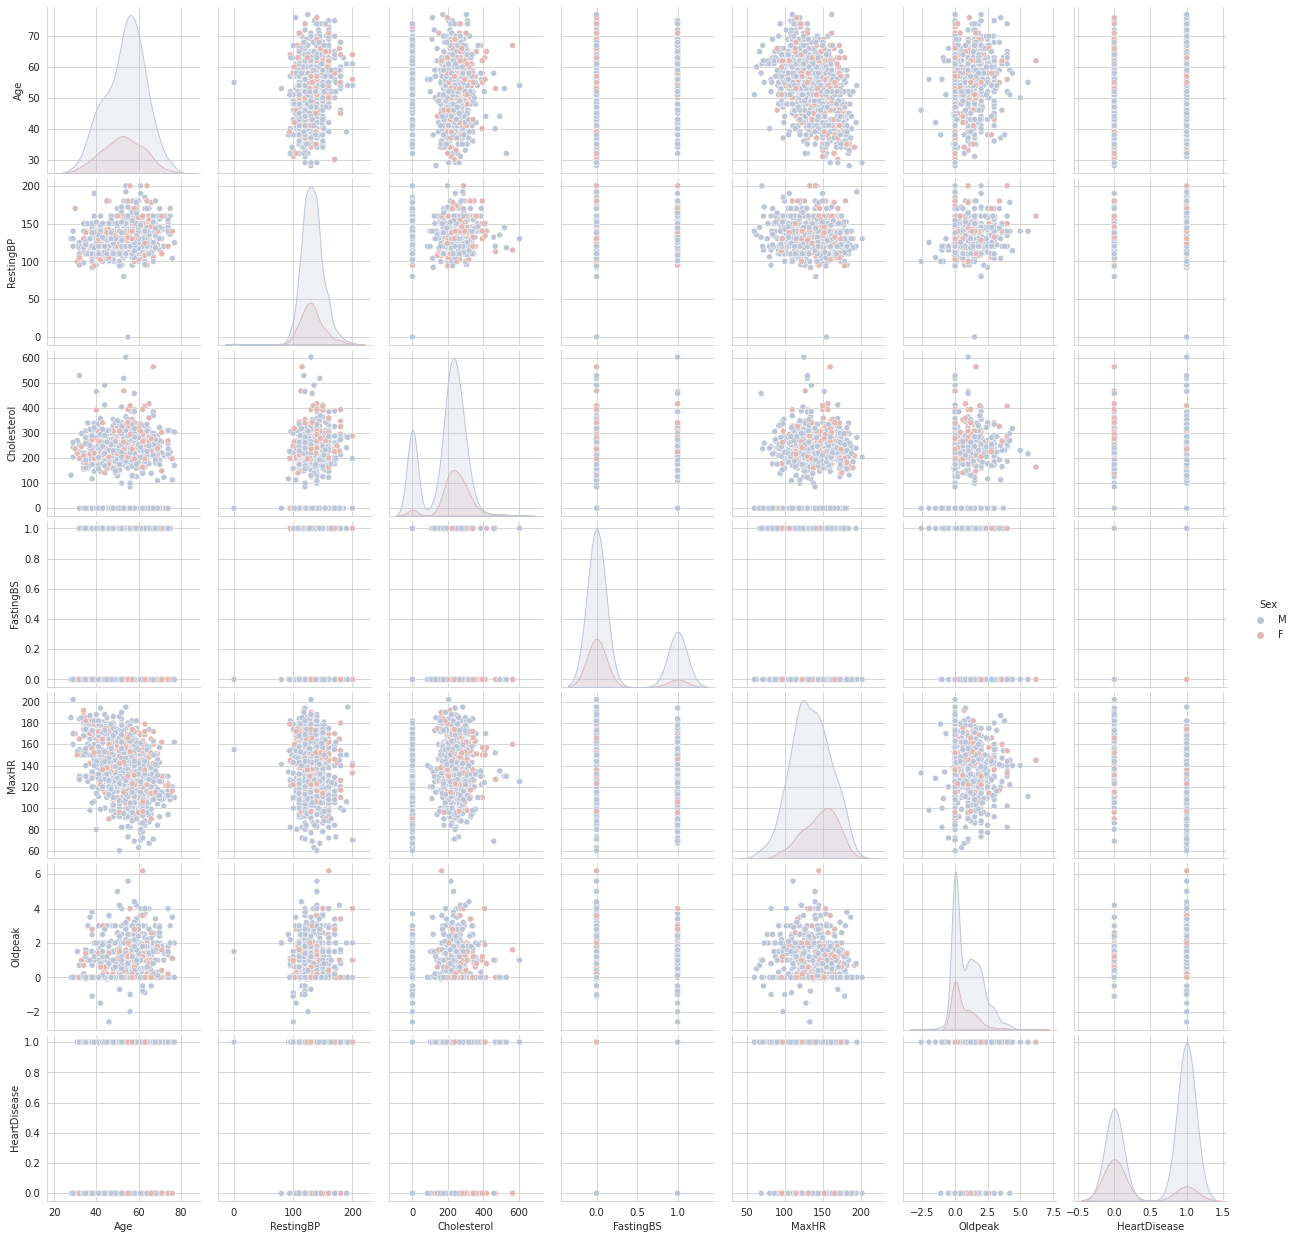

In [14]:
mean_col=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']
sns.pairplot(data[mean_col], hue='Sex', palette='vlag')

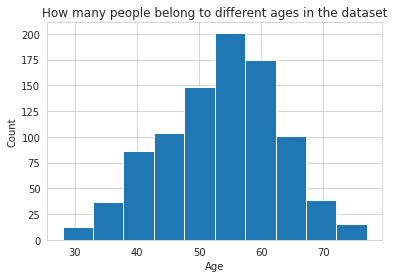

In [15]:
plt.hist(data["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("How many people belong to different ages in the dataset")
plt.show()

In [16]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Text(0.5, 1.0, 'Plot show the count according to the ChestPainType')

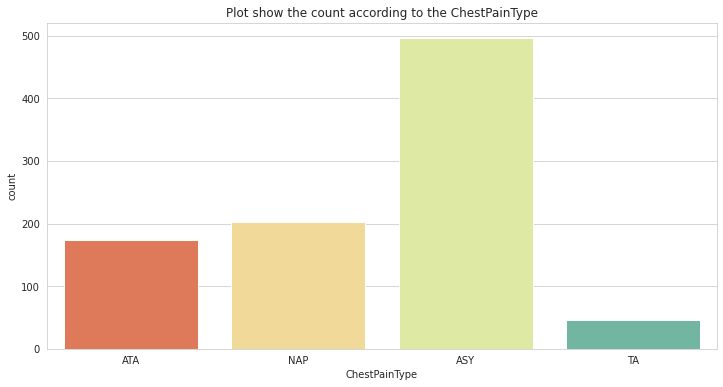

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="ChestPainType", data=data, palette='Spectral');
plt.title("Plot show the count according to the ChestPainType")

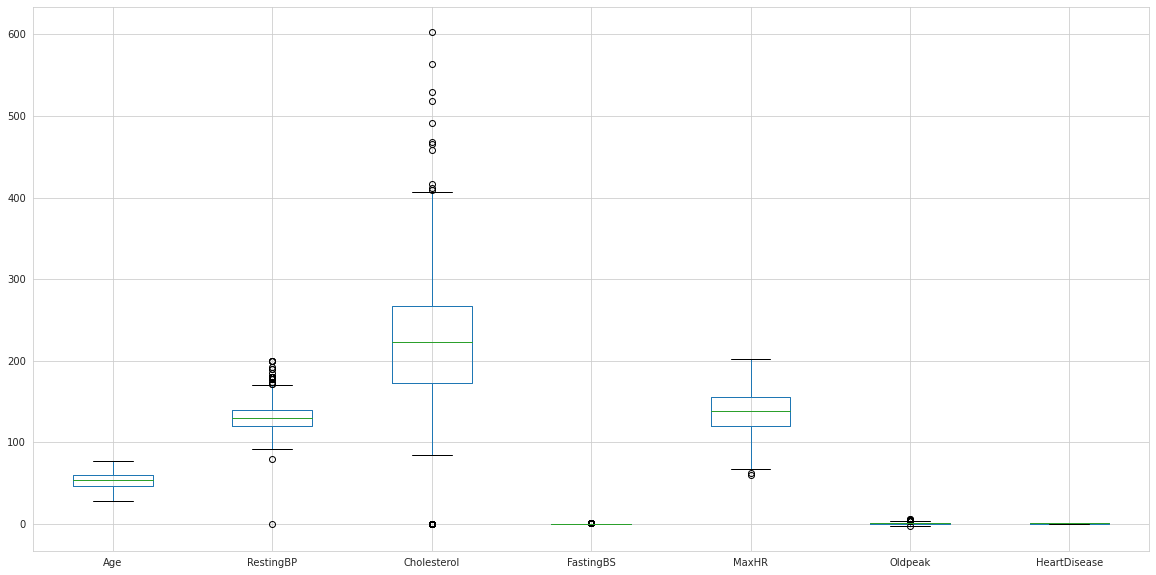

In [18]:
plt.figure(figsize =(20, 10))
data.boxplot()
plt.show()

In [19]:
px.box(data,x = "Age", y = "ChestPainType")

In [20]:
px.box(data,x = "Age", y = "RestingBP")

##### Box plot to detect the outliers 

In [21]:
px.box(data,x = "Sex", y = "RestingBP")

### Creating a test and train set 

In [22]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

In [23]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [24]:
cat = ['Sex','ChestPainType','ExerciseAngina','ST_Slope','RestingECG']
for i in cat:
    data[i] = encode.fit_transform(data[i])
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0


In [25]:
x=data.iloc[:,:-1]
print(x)
y = data.iloc[:,-1]
print (y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

### Model building 

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [27]:
x_train.shape

(688, 11)

In [28]:
y_train.shape

(688,)

### Scaling the dataset 

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)

In [31]:
x_test = scaler.fit_transform(x_test)

## 1.Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred=lr_model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score:", lr_model.score(x_train, y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Logistic Regression Model is: ", accuracy_score(y_test, y_pred)*100 , "%")
lr_model_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        98
           1       0.90      0.86      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

[[ 85  13]
 [ 19 113]]
Training Score: 86.04651162790698
The accuracy of the Logistic Regression Model is:  86.08695652173914 %


In [34]:
#Checking out the actual vs predicted values with the 
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
668,0,0
30,1,0
377,1,1
535,1,1
807,0,0
...,...,...
259,0,0
490,1,1
302,1,1
7,0,0


## 2. Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [36]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Decision Tree Model is: ", accuracy_score(y_test, y_pred)*100, "%")
dtree_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.87      0.84      0.85       132

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.84       230

[[ 81  17]
 [ 21 111]]
Training Score:  91.42441860465115
The accuracy of the Decision Tree Model is:  83.47826086956522 %


## 3.Random Forest Classifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Random Forest Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
rfc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230

[[ 87  11]
 [ 13 119]]
Training Score:  100.0
The accuracy of the Random Forest Classifier Model is:  89.56521739130436 %


## 4. K Nearest Neighbors Classifier (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the K Neareset Neighbors Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
knn_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        98
           1       0.87      0.86      0.87       132

    accuracy                           0.85       230
   macro avg       0.84      0.85      0.84       230
weighted avg       0.85      0.85      0.85       230

[[ 81  17]
 [ 18 114]]
Training Score:  88.0813953488372
The accuracy of the K Neareset Neighbors Classifier Model is:  84.78260869565217 %


## Support Vector Machine Classifier (SVM)

In [41]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train, y_train)

SVC()

In [42]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",svc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Support Vector Machine Classification Model is: ", accuracy_score(y_test, y_pred)*100, "%")
svc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        98
           1       0.89      0.90      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

[[ 84  14]
 [ 13 119]]
Training Score:  89.68023255813954
The accuracy of the Support Vector Machine Classification Model is:  88.26086956521739 %


## 6. ADA Boost Classifier 

In [43]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(base_estimator = None)

adb.fit(x_train, y_train)

AdaBoostClassifier()

In [44]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",adb.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Ada Boost Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
adb_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        98
           1       0.91      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230

[[ 87  11]
 [ 20 112]]
Training Score:  88.0813953488372
The accuracy of the Ada Boost Classifier Model is:  86.52173913043478 %


## 7.Gradient Boost Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [46]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Gradient Boost Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
gbc_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

[[ 88  10]
 [ 20 112]]
Training Score:  94.3313953488372
The accuracy of the Gradient Boost Classifier Model is:  86.95652173913044 %


## 8.Extreme Gradient Boosting(XGB) Classifier 

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective ='reg:linear', colsample_bytree= 0.3, learning_rate=0.1,
                  max_depth=5, alpha=10, n_estimators=10)

xgb.fit(x_train, y_train)

[08:24:23] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",xgb.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Extreme Gradient Boosting Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
xgb_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        98
           1       0.86      0.87      0.86       132

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230

[[ 79  19]
 [ 17 115]]
Training Score:  85.17441860465115
The accuracy of the Extreme Gradient Boosting Classifier Model is:  84.34782608695653 %


## 9.Naive Bayes 

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [50]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Naive Bayes Model is: ", accuracy_score(y_test, y_pred)*100, "%")
gnb_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.90      0.85      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

[[ 85  13]
 [ 20 112]]
Training Score:  85.75581395348837
The accuracy of the Naive Bayes Model is:  85.65217391304348 %


## 10.Stochastic Gradient Descent (SGD)

In [51]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

In [52]:
sgdc.fit(x_train,y_train)
pred=sgdc.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print("Training Score: ",sgdc.score(x_train,y_train)*100)

print(classification_report(y_test, pred))
print("The accuracy of the SGD Model is: ",accuracy_score(y_test,pred)*100,"%")
sgdc_result =accuracy_score(y_test,pred)*100

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.90      0.85      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

[[ 85  13]
 [ 20 112]]
Training Score:  82.99418604651163
              precision    recall  f1-score   support

           0       0.80      0.76      0.77        98
           1       0.82      0.86      0.84       132

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.81      0.81      0.81       230

The accuracy of the SGD Model is:  81.30434782608695 %


In [54]:
print("Logistic Regression: ",lr_model_results)
print("Decision Tree: ",dtree_results)
print("Random Forest: ",rfc_results)
print("K Nearest Neighbors: ",knn_results)
print("Support Vector Machine: ",svc_results)
print("Ada Boost: ",adb_results)
print("Gradient Boost: ",gbc_results)
print("Extreme Gradient Boost: ",xgb_results)
print("Naive Bayes: ",gnb_results)
print("Stochastic Gradient Descent (SGD): ",sgdc_result)

Logistic Regression:  86.08695652173914
Decision Tree:  83.47826086956522
Random Forest:  89.56521739130436
K Nearest Neighbors:  84.78260869565217
Support Vector Machine:  88.26086956521739
Ada Boost:  86.52173913043478
Gradient Boost:  86.95652173913044
Extreme Gradient Boost:  84.34782608695653
Naive Bayes:  85.65217391304348
Stochastic Gradient Descent (SGD):  81.30434782608695
